In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('Fast Delivery Agent Reviews.csv')

In [4]:
df.head()

,Agent Name,Rating,Review Text,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,Order Accuracy
0,Zepto,4.5,Purpose boy job cup decision girl now get job ...,58,Delhi,Essentials,Neutral,High,Yes,Out of Stock,4,Incorrect
1,Zepto,2.1,Prevent production able both the box school wa...,25,Lucknow,Grocery,Negative,Low,No,Out of Stock,2,Correct
2,JioMart,4.5,Family station listen agreement more kitchen l...,54,Ahmedabad,Essentials,Neutral,Low,No,Out of Stock,3,Correct
3,JioMart,2.6,World north people area everything enter beyon...,22,Chennai,Essentials,Neutral,Low,Yes,In Stock,1,Incorrect
4,Zepto,3.6,Hand way yourself tax whether sister anyone ef...,34,Pune,Pharmacy,Positive,High,No,In Stock,2,Incorrect


In [5]:
df.columns

Index(['Agent Name', 'Rating', 'Review Text', 'Delivery Time (min)',
       'Location', 'Order Type', 'Customer Feedback Type', 'Price Range',
       'Discount Applied', 'Product Availability', 'Customer Service Rating',
       'Order Accuracy'],
      dtype='object')

In [6]:
df.shape


(5000, 12)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Agent Name               5000 non-null   object 
 1   Rating                   5000 non-null   float64
 2   Review Text              5000 non-null   object 
 3   Delivery Time (min)      5000 non-null   int64  
 4   Location                 5000 non-null   object 
 5   Order Type               5000 non-null   object 
 6   Customer Feedback Type   5000 non-null   object 
 7   Price Range              5000 non-null   object 
 8   Discount Applied         5000 non-null   object 
 9   Product Availability     5000 non-null   object 
 10  Customer Service Rating  5000 non-null   int64  
 11  Order Accuracy           5000 non-null   object 
dtypes: float64(1), int64(2), object(9)
memory usage: 468.9+ KB


In [8]:
df.describe()

,Rating,Delivery Time (min),Customer Service Rating
count,5000.00000,5000.000000,5000.000000
mean,3.00290,34.962400,2.972000
std,1.15214,14.789656,1.409969
min,1.00000,10.000000,1.000000
25%,2.00000,22.000000,2.000000
50%,3.00000,35.000000,3.000000
75%,4.00000,48.000000,4.000000
max,5.00000,60.000000,5.000000


In [9]:
df.isnull().sum()

Agent Name                 0
Rating                     0
Review Text                0
Delivery Time (min)        0
Location                   0
Order Type                 0
Customer Feedback Type     0
Price Range                0
Discount Applied           0
Product Availability       0
Customer Service Rating    0
Order Accuracy             0
dtype: int64

In [11]:
#How many unique delivery agents are there?
df['Agent Name'].nunique()

4

In [12]:
df['Agent Name'].unique()

array(['Zepto', 'JioMart', 'Blinkit', 'Swiggy Instamart'], dtype=object)

In [13]:
#What is the average rating overall?
df['Rating'].mean()

np.float64(3.0029)

In [14]:
#What is the distribution of Customer Feedback Type (Positive, Neutral, Negative)?
df['Customer Feedback Type'].value_counts()

Customer Feedback Type
Negative    1727
Positive    1648
Neutral     1625
Name: count, dtype: int64

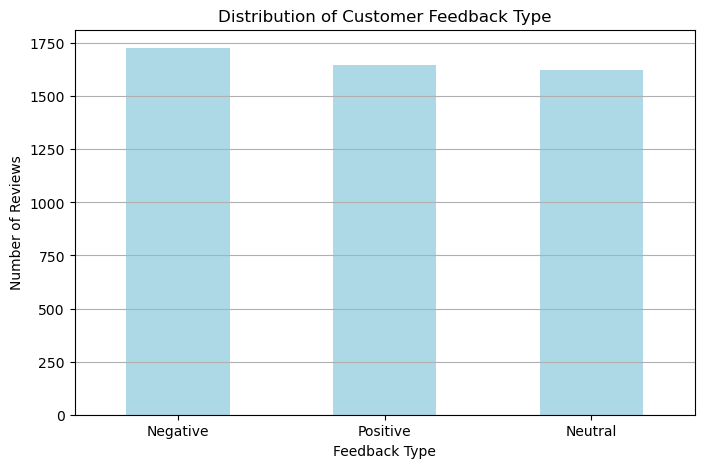

In [26]:
import matplotlib.pyplot as plt

# Plotting bar chart
df['Customer Feedback Type'].value_counts().plot(kind='bar', color='lightblue', figsize=(8,5))
plt.title('Distribution of Customer Feedback Type')
plt.xlabel('Feedback Type')
plt.ylabel('Number of Reviews')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [21]:
#Which cities (Location) have the highest number of orders?
df['Location'].value_counts()

Location
Kolkata      517
Ahmedabad    515
Pune         515
Delhi        514
Bangalore    513
Mumbai       498
Hyderabad    490
Jaipur       489
Chennai      478
Lucknow      471
Name: count, dtype: int64

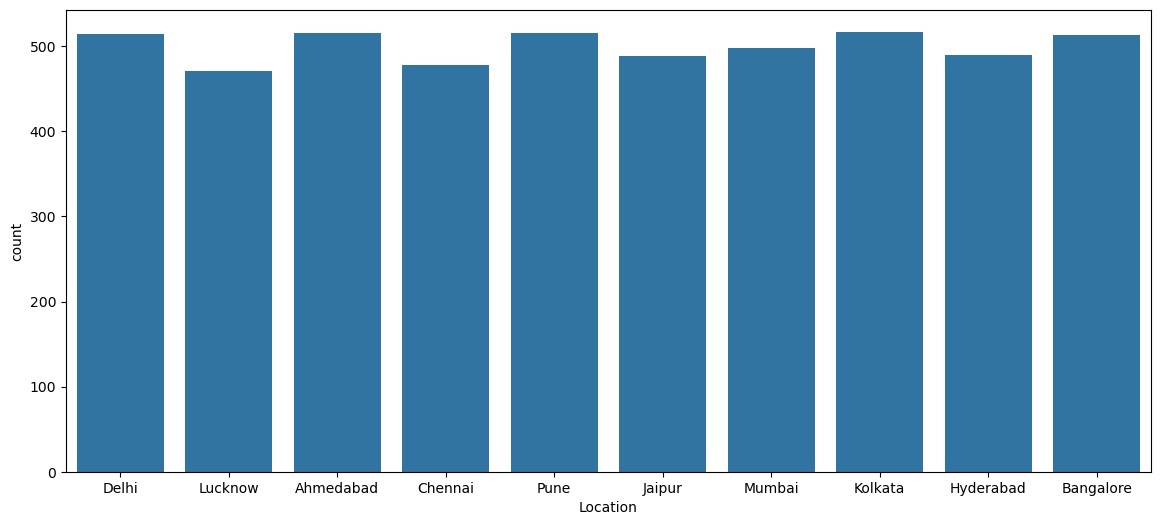

In [31]:
plt.figure(figsize=(14, 6))
sns.countplot(data=df,x='Location')
plt.show()


In [22]:
#How many orders were accurate vs inaccurate (Order Accuracy)?
df['Order Accuracy'].value_counts()

Order Accuracy
Correct      2515
Incorrect    2485
Name: count, dtype: int64

<Axes: xlabel='Order Accuracy', ylabel='count'>

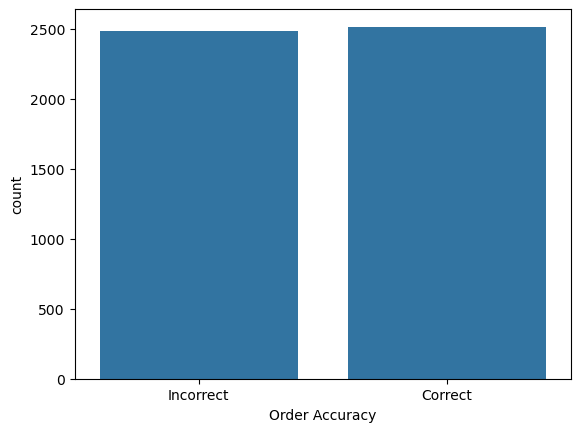

In [32]:
sns.countplot(data=df,x='Order Accuracy')

In [23]:
#What are the most common Order Types?
df['Order Type'].value_counts()

Order Type
Electronics    1008
Food           1003
Essentials     1001
Grocery         995
Pharmacy        993
Name: count, dtype: int64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_17232\3762671882.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Order Type', palette='viridis')


<Axes: xlabel='Order Type', ylabel='count'>

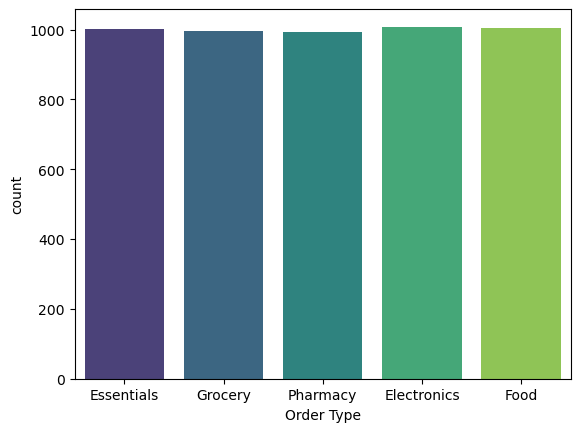

In [33]:
sns.countplot(data=df, x='Order Type', palette='viridis')

In [36]:
#What’s the average delivery time per Agent Name?
df.groupby('Agent Name')['Delivery Time (min)'].mean()

Agent Name
Blinkit             34.649371
JioMart             35.026961
Swiggy Instamart    35.119476
Zepto               35.061622
Name: Delivery Time (min), dtype: float64

In [43]:
#Which agent has the highest average rating?
df.groupby('Agent Name')['Rating'].mean().sort_values(ascending=False)

Agent Name
Swiggy Instamart    3.018331
Zepto               3.014509
Blinkit             2.993239
JioMart             2.985376
Name: Rating, dtype: float64

In [44]:
df.columns

Index(['Agent Name', 'Rating', 'Review Text', 'Delivery Time (min)',
       'Location', 'Order Type', 'Customer Feedback Type', 'Price Range',
       'Discount Applied', 'Product Availability', 'Customer Service Rating',
       'Order Accuracy'],
      dtype='object')

In [45]:
#Is there any correlation between delivery time and customer service rating?
correlation=df['Delivery Time (min)'].corr(df['Customer Service Rating'])
print(correlation)

-0.0029283615582401004


means no correlation between  delivery time and customer service .


In [47]:
df.head()

,Agent Name,Rating,Review Text,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,Order Accuracy
0,Zepto,4.5,Purpose boy job cup decision girl now get job ...,58,Delhi,Essentials,Neutral,High,Yes,Out of Stock,4,Incorrect
1,Zepto,2.1,Prevent production able both the box school wa...,25,Lucknow,Grocery,Negative,Low,No,Out of Stock,2,Correct
2,JioMart,4.5,Family station listen agreement more kitchen l...,54,Ahmedabad,Essentials,Neutral,Low,No,Out of Stock,3,Correct
3,JioMart,2.6,World north people area everything enter beyon...,22,Chennai,Essentials,Neutral,Low,Yes,In Stock,1,Incorrect
4,Zepto,3.6,Hand way yourself tax whether sister anyone ef...,34,Pune,Pharmacy,Positive,High,No,In Stock,2,Incorrect


In [50]:
#Does discount availability (Discount Applied) affect the rating?"Is there a difference in customer ratings when a discount is applied vs. not applied?"
df.groupby('Discount Applied')['Rating'].mean()

Discount Applied
No     2.985302
Yes    3.019984
Name: Rating, dtype: float64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_17232\2116193821.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Discount Applied', y='Rating', palette='pastel')


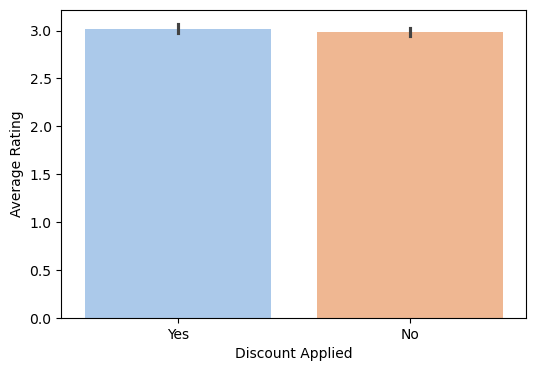

In [52]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Discount Applied', y='Rating', palette='pastel')
plt.xlabel('Discount Applied')
plt.ylabel('Average Rating')
plt.show()

In [59]:
#Which price range (Price Range) has the most negative feedback?
df['Price Range'].unique()

array(['High', 'Low', 'Medium'], dtype=object)

In [60]:
df['Customer Feedback Type'].unique()

array(['Neutral', 'Negative', 'Positive'], dtype=object)

In [66]:
df[df['Customer Feedback Type']=='Negative']["Price Range"].value_counts()

Price Range
Low       618
Medium    559
High      550
Name: count, dtype: int64

means order having low price range has the most negative feedback 

In [71]:
# Do In Stock vs Out of Stock orders affect customer ratings?
df.groupby('Product Availability')['Rating'].mean()

Product Availability
In Stock        2.996996
Out of Stock    3.008789
Name: Rating, dtype: float64

C:\Users\KIIT\AppData\Local\Temp\ipykernel_17232\2260237481.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='Product Availability', y='Rating', palette='muted')


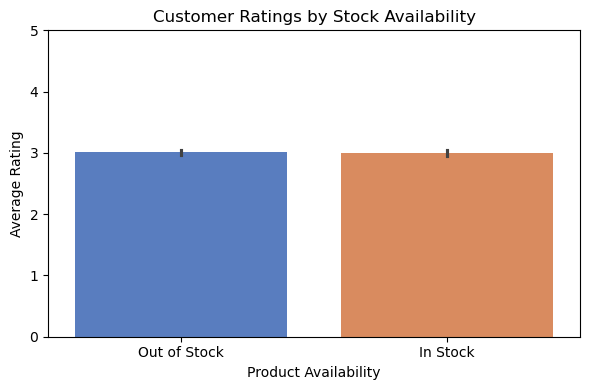

In [74]:
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Product Availability', y='Rating', palette='muted')

plt.title('Customer Ratings by Stock Availability')
plt.xlabel('Product Availability')
plt.ylabel('Average Rating')
plt.ylim(0, 5)
plt.tight_layout()
plt.show()

In [76]:
#Which location has the best customer service ratings on average?
df.groupby('Location')['Customer Service Rating'].mean().sort_values(ascending=False)

Location
Lucknow      3.121019
Jaipur       3.042945
Pune         3.019417
Delhi        3.011673
Ahmedabad    3.000000
Kolkata      2.996132
Mumbai       2.975904
Chennai      2.912134
Hyderabad    2.865306
Bangalore    2.781676
Name: Customer Service Rating, dtype: float64

In [77]:
df.head()

,Agent Name,Rating,Review Text,Delivery Time (min),Location,Order Type,Customer Feedback Type,Price Range,Discount Applied,Product Availability,Customer Service Rating,Order Accuracy
0,Zepto,4.5,Purpose boy job cup decision girl now get job ...,58,Delhi,Essentials,Neutral,High,Yes,Out of Stock,4,Incorrect
1,Zepto,2.1,Prevent production able both the box school wa...,25,Lucknow,Grocery,Negative,Low,No,Out of Stock,2,Correct
2,JioMart,4.5,Family station listen agreement more kitchen l...,54,Ahmedabad,Essentials,Neutral,Low,No,Out of Stock,3,Correct
3,JioMart,2.6,World north people area everything enter beyon...,22,Chennai,Essentials,Neutral,Low,Yes,In Stock,1,Incorrect
4,Zepto,3.6,Hand way yourself tax whether sister anyone ef...,34,Pune,Pharmacy,Positive,High,No,In Stock,2,Incorrect


In [80]:
#How does the accuracy of the order affect overall rating?
df['Order Accuracy'].map({
    'Incorrect':0,
    'Correct':1
}).corr(df['Customer Service Rating'])

np.float64(0.02934310719398732)

as the corr relation is close to 0 there is no relationship between the 2 .

In [84]:
#Use groupby to find the average Customer Service Rating per Order Type and Location.
df.groupby(['Order Type',"Location"])['Customer Service Rating'].mean().sort_values()

Order Type   Location 
Food         Bangalore    2.685714
Grocery      Bangalore    2.696970
Food         Chennai      2.741573
             Hyderabad    2.775000
Grocery      Hyderabad    2.777778
Electronics  Chennai      2.785714
Pharmacy     Bangalore    2.796460
Essentials   Bangalore    2.811881
             Ahmedabad    2.846154
             Hyderabad    2.848485
Grocery      Mumbai       2.849462
Electronics  Jaipur       2.881188
Pharmacy     Chennai      2.897727
Electronics  Kolkata      2.903846
Pharmacy     Lucknow      2.907216
Electronics  Mumbai       2.911111
Essentials   Lucknow      2.916667
Food         Delhi        2.925000
Electronics  Bangalore    2.926316
             Hyderabad    2.943396
             Pune         2.951456
Food         Kolkata      2.953704
Pharmacy     Hyderabad    2.969072
Food         Mumbai       2.971154
Essentials   Kolkata      2.973451
             Pune         2.978723
Pharmacy     Mumbai       2.981132
Food         Pune         2.9818